# Customer Transaction Prediction Model

In [1]:
import os
import pandas as pd

### Data Reader

In [2]:
def data_reader(data_path):
    # Reading train and test data
    train_df = pd.read_csv(os.path.join(data_path, "train.csv"))
    test_df  = pd.read_csv(os.path.join(data_path, "test.csv"))
    
    # Spliting features and target
    train_target = train_df.target
    train_features = train_df.drop(columns=['ID_code', 'target'])
    test_idcode = test_df.ID_code
    test_features = test_df.drop(columns=['ID_code'])
    
    return train_features, train_target, test_features, test_idcode

### Main Function

In [3]:
# if __name__ == "__main__":

# Reading data for modelling    
data_path = "../Data"

train_features, train_target, test_features, test_idcode = data_reader(data_path)
print(train_features.shape, train_target.shape, test_features.shape)

(200000, 200) (200000,) (200000, 200)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_features, train_target, test_size=0.2)

print("Training Size = {}, ".format(X_train.shape), " Number of transactions = {}".format(y_train.sum()))
print("Testing Size = {}, ".format(X_test.shape), " Number of transactions = {}".format(y_test.sum()))

Training Size = (160000, 200),   Number of transactions = 16070
Testing Size = (40000, 200),   Number of transactions = 4028


## Prediction Modelling

#### Defining decision tree model

In [73]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', random_state=0)

#### Training model

In [74]:
dt_classifier.fit(train_features, train_target)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

#### Feature Importance

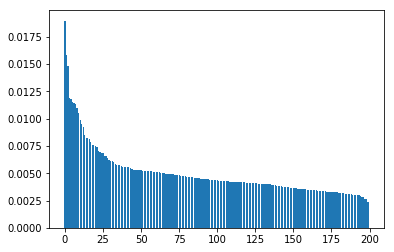

In [75]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.bar(np.arange(200) , np.sort(dt_classifier.feature_importances_)[::-1], width=0.8)
plt.show()

#### Testing model

In [76]:
y_pred = dt_classifier.predict(test_features)

In [78]:
print(y_test.sum())
print(y_pred.sum())

# from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=y_pred))
# print(precision_recall_fscore_support(y_test, y_pred))

4028
20781


In [89]:
sub_data = {'ID_code': np.array(test_idcode), 'target': y_pred}
submission = pd.DataFrame(data=sub_data)

submission.to_csv('../Submissions/submission_2.csv', index = False)

In [90]:
submission

,ID_code,target
0,test_0,0
1,test_1,1
2,test_2,0
3,test_3,0
4,test_4,0
5,test_5,0
6,test_6,0
7,test_7,0
8,test_8,0
9,test_9,0
